# Gestión Segura de Datos de Clientes

En este notebook se implementara un sistema básico de gestión y análisis de datos de clientes, aplicando técnicas de pseudonimización, anonimización y balanceo de datos.


## Objetivo
El proyecto consiste en desarrollar un sistema de gestión y análisis de datos de clientes que implemente técnicas de pseudonimización, anonimización y balanceo de datos para proteger la privacidad de los usuarios y asegurar un análisis equitativo.


## Consignas
1. Cargar los datos de clientes provistos en un archivo CSV.
2. Aplicar técnicas de anonimización al campo `direccion`, `edad` y `salario` para proteger la identidad de los clientes.
3. Aplicar técnicas de pseudonimización al campo `nombre`.
4. Implementar una función de balanceo de datos para asegurar la representación equitativa de diversas categorías en el análisis posterior.
5. Realizar un análisis simple de los datos para identificar tendencias o patrones que podrían ser útiles para decisiones de negocios o marketing.


In [55]:
#librerias
import pandas as pd
import numpy as np
import uuid
import hashlib
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
ruta = "\\Users\\TB\\Downloads\\clientes.csv"
df = pd.read_csv(ruta)
df.describe()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   nombre     200 non-null    object
 1   direccion  200 non-null    object
 2   edad       200 non-null    int64 
 3   categoria  200 non-null    int64 
 4   salario    200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,62,0,61050
1,James Jones,729 Neruda,65,1,53824
2,Patricia Wilson,935 Dickinson,18,0,60281
3,Elizabeth Robinson,459 Rilke,21,1,42187
4,Charles Brown,823 Ginsberg,21,1,37589


In [16]:
#Elimnar la columna direccion
df.drop(["direccion"], axis=1, inplace=True)
df.head(3)

,nombre,edad,categoria,salario
0,Richard Martin,62,0,61050
1,James Jones,65,1,53824
2,Patricia Wilson,18,0,60281


In [21]:
#Cambiar edades (redondear)
df["edad"] = (df["edad"] // 10) * 10
df.head(5)

,nombre,edad,categoria,salario
0,Richard Martin,60,0,61050
1,James Jones,60,1,53824
2,Patricia Wilson,10,0,60281
3,Elizabeth Robinson,20,1,42187
4,Charles Brown,20,1,37589


In [31]:
#Salario ruido

ruido = np.random.normal(0, 2, size=df["salario"].shape)
df["salario"] += ruido
df.head(5)


,nombre,edad,categoria,salario
0,Richard Martin,60,0,60593.313424
1,James Jones,60,1,53635.904321
2,Patricia Wilson,10,0,61330.279342
3,Elizabeth Robinson,20,1,40178.028311
4,Charles Brown,20,1,37863.154397


In [36]:
# Encriptar nombres
def hash_df(df):
    return hashlib.sha256(df.encode()).hexdigest()

hash_nombres = []

for nombre in df["nombre"]:
    h_nombre = hash_df(nombre)
    hash_nombres.append(h_nombre)

df["nombre"] = hash_nombres

df.head(5)

,nombre,edad,categoria,salario
0,1cfed65142be635c8797352d10d105ca1b84b218178846...,60,0,60593.313424
1,428469d53dc5852ae409a3fc12f0b4388387f2789fd894...,60,1,53635.904321
2,ef24f54cd096967129cce7bb871a2956318a968a93835f...,10,0,61330.279342
3,1be55819ed23e719e207b4b76dc647f4d37c2923fd513a...,20,1,40178.028311
4,477e3b12f8fe1d664d10017a27d02ec537302267d70065...,20,1,37863.154397


In [50]:
# Balanceo de datos
agrupado = df.groupby("categoria")

df_balanceado = pd.DataFrame()

for nombre, categoria in agrupado:
    categoria_balanceada = resample(categoria, replace=True, n_samples=100, random_state=123)
    df_balanceado = pd.concat([df_balanceado, categoria_balanceada])

df_balanceado


,nombre,direccion,edad,categoria,salario
158,John Robinson,373 Rimbaud,56,0,41543
42,Thomas Garcia,498 Milton,37,0,59435
194,John Johnson,327 Cummings,42,0,49811
133,Elizabeth Martinez,914 Brodsky,52,0,41837
114,John Davis,316 Auden,68,0,53436
...,...,...,...,...,...
179,Linda Taylor,728 Dickinson,44,1,54195
80,Joseph Thompson,906 Cummings,18,1,56252
93,Michael Jones,964 Yeats,54,1,49369
156,Karen Jones,129 Darwish,50,1,48107


[Text(0.5, 0, 'Edad'),
 Text(0, 0.5, 'Frecuencia'),
 Text(0.5, 1.0, 'Distribucion de edades de los clientes')]

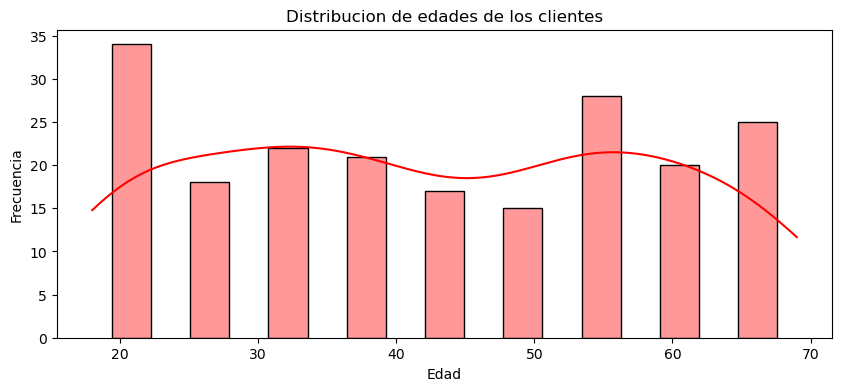

In [75]:
# Distribucion segun edades 

plt.figure(figsize=(10,4))

ax= sns.histplot(x = df["edad"], kde = True, shrink = 0.5, color = "red", alpha = 0.4)

ax.set(xlabel = "Edad", ylabel = "Frecuencia", title="Distribucion de edades de los clientes" )



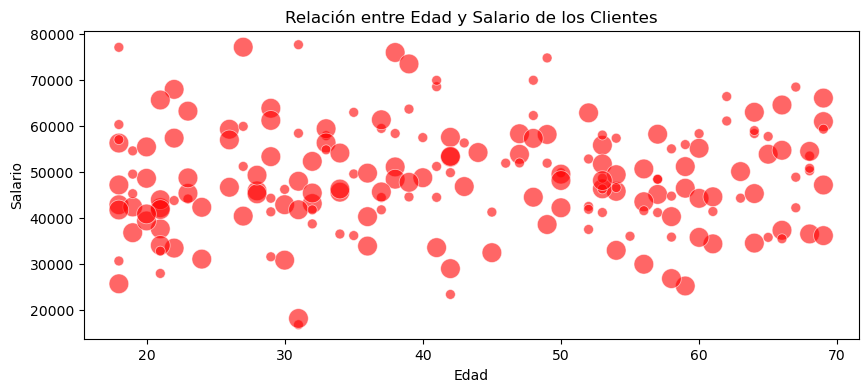

In [109]:
# Relacion entre edad y salario
plt.figure(figsize=(10, 4))
scatter = sns.scatterplot(x='edad',
                          y='salario',
                          size=sizes,
                          legend=False,
                          sizes=(50, 200),
                          data=df,
                          color='red',
                          alpha=0.6)
scatter.set(title='Relación entre Edad y Salario de los Clientes',
            xlabel='Edad',
            ylabel='Salario');


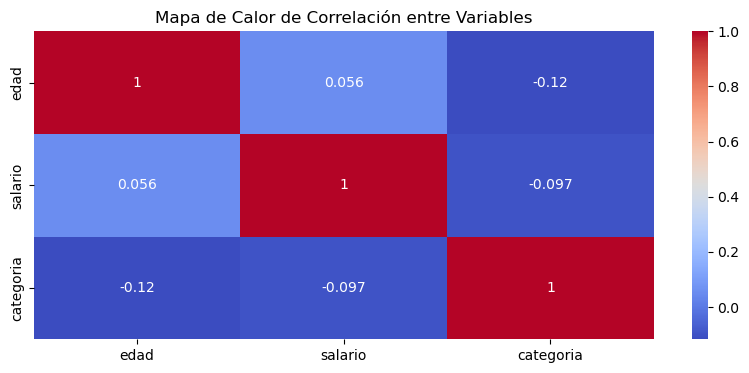

In [108]:
# Visualización 3: Mapa de Calor de Correlación entre Variables
plt.figure(figsize=(10, 4))
# Calculamos la matriz de correlación
correlation_matrix = df[['edad', 'salario', 'categoria']].corr()
heatmap = sns.heatmap(correlation_matrix,
                      annot=True,
                      cmap='coolwarm')
heatmap.set(title='Mapa de Calor de Correlación entre Variables');